# Example Usage for GeoCluster Package

In [1]:
## Basic stuff
#%load_ext autoreload
#%autoreload
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("""<style>div.output_area{max-height:10000px;overflow:scroll;}</style>"""))


## Python Version
import sys
print("Python: {0}".format(sys.version))


## Install
from timeUtils import clock, elapsed
from geocluster import geoClusters

import datetime as dt
start = dt.datetime.now()
print("Notebook Last Run Initiated: "+str(start))

Python: 3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Notebook Last Run Initiated: 2018-11-01 13:56:09.841249


# Example GPS Data

In [107]:
def convertMetersToLat(dist, debug=False):
    from numpy import pi
    
    # Earth's radius, sphere
    R=6378137

    # Distances
    dn = dist

    # Coordinate offsets in radians
    dLat = dn/R
    
    # OffsetPosition, decimal degrees
    lat = dLat * 180/pi
    
    return lat

def convertLatToMeters(ang, debug=False):
    from numpy import pi
    
    # Earth's radius, sphere
    R=6378137
    
    # convert decimal to radians
    dLat = ang * pi/180
    
    # scale to Earth's radius
    dist = dLat * R
    
    return dist

def convertMetersToLong(dist, lat, debug=False):
    from numpy import pi, cos

    # Earth's radius, sphere
    R=6378137

    # Distances
    de = dist

    # Coordinate offsets in radians
    dLon = de/(R*cos(pi*lat/180))
    
    # OffsetPosition, decimal degrees
    lng = dLon * 180/pi
    
    return lng

def convertLongToMeters(ang, lat, debug=False):
    from numpy import pi, cos

    # Earth's radius, sphere
    R=6378137
    
    # convert decimal to radians
    dLon = ang * pi/180
    dLat = lat * pi/180
    
    # scale to Earth's radius with known latitude
    dist = dLon * (R*cos(dLat))
    
    return dist

In [110]:
convertLatToMeters(1)
convertLongToMeters(1, 0)
convertLongToMeters(1, 30)
convertLongToMeters(1, 60)

55659.745396636805

In [124]:
def genCenters(n, latRange, lngRange, retList=False, debug=False):
    from numpy.random import uniform
    from numpy import array
    
    if debug:
        print("Generating {0} Latitude centers between ({1}, {2})".format(n, latRange[0], latRange[1]))
    latvals = uniform(low=latRange[0], high=latRange[1], size=n)
    
    if debug:
        print("Generating {0} Longitude centers between ({1}, {2})".format(n, lngRange[0], lngRange[1]))
    lngvals = uniform(low=lngRange[0], high=lngRange[1], size=n)
        
    if retList is True:
        retval = list(zip(latvals, lngvals))
    else:
        arrs = [array(latvals), array(lngvals)]
        retval = array(arrs).transpose()
    
    return retval

def genCluster(npoints, center, dist="gauss", maxrad=100, retList=False, debug=False):
    from numpy.random import normal, uniform
    from numpy import array
    
    ## Generate Latitude
    if dist == "gauss":
        mulat, siglat = center[0], convertMetersToLat(maxrad) # mean and standard deviation
        if debug:
            print("Generating Latitude {0} samples of Gaussian({1}, {2})".format(npoints, mulat, round(siglat,5)))
        lat = normal(mulat, siglat, npoints)
    if dist == "uniform":
        mulat, siglat = center[0], convertMetersToLat(maxrad) # mean and standard deviation
        if debug:
            print("Generating Latitude {0} samples of Uniform({1}, {2})".format(npoints, mulat, round(siglat,5)))
        lat = uniform(mulat, -siglat/2, siglat/2, npoints)
    
    
    ## Generate Longitude
    if dist == "gauss":
        mulng, siglng = center[1], convertMetersToLong(maxrad, center[0]) # mean and standard deviation
        if debug:
            print("Generating Longitude {0} samples of Gaussian({1}, {2})".format(npoints, mulng, round(siglng,5)))
        lng = normal(mulng, siglng, npoints)
    if dist == "uniform":
        mulng, siglng = center[1], convertMetersToLong(maxrad, center[0]) # mean and standard deviation
        if debug:
            print("Generating Longitude {0} samples of Gaussian({1}, {2})".format(npoints, mulng, round(siglng,5)))
        lng = uniform(mulng, -siglng/2, siglat/2, npoints)
    
    arrs = [array(lat), array(lng)]
    arr2d = array(arrs)
    arr2d = arr2d.transpose()
    
    return arr2d

def genClusters(n, ppc, latRange, lngRange, dist="gauss", maxrad=100, mix=True, debug=False):
    from numpy import ceil, vstack
    from numpy.random import shuffle
    
    if debug:
        print("Generating {0} Centers".format(n))
    centers = genCenters(n, latRange, lngRange, retList=True, debug=debug)
    
    clusters = []
    for center in centers:
        cluster = genCluster(npoints=ppc, center=center, dist=dist, maxrad=maxrad, retList=False, debug=debug)
        clusters.append(cluster)
    
    retval = vstack(clusters)
    if mix is True:
        shuffle(retval)
        
    return retval

In [143]:
genMax  = 75
distMax = 500
raw = genClusters(10, 250, latRange=[29.9, 30.1], lngRange=[29.9, 30.1], dist="gauss", maxrad=genMax)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current Time is Thu Nov 01, 2018 17:10:06 for Converting 2500 Points To Correct Format
Data has correct format with a (2500, 2) shape.
Current Time is Thu Nov 01, 2018 17:10:06 for Done with Converting 2500 Points To Correct Format
Process [Done with Converting 2500 Points To Correct Format] took 0 seconds.
Current Time is Thu Nov 01, 2018 17:10:06 for Finding Geohash (BitLen=8) Values from 2500 Points
Current Time is Thu Nov 01, 2018 17:10:06 for Done with Finding Geohash (BitLen=8) Values from 2500 Points
Process [Done with Finding Geohash (BitLen=8) Values from 2500 Points] took 0 seconds.
Current Time is Thu Nov 01, 2018 17:10:06 for Finding Geohash (BitLen=8) Frequency Values from Geohash DataFrame
Current Time is Thu Nov 01, 2018 17:10:06 for Done with Finding Geohash (BitLen=8) Frequency Values from Geohash DataFrame
Process [Done with Finding Geohash (BitLen=8) Frequency Values from Geohash 

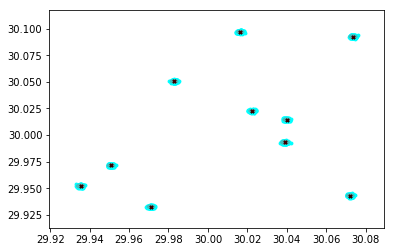

In [147]:
def plotMeters(ax1, longMeters, latMeters):
    ax2 = ax1.twinx()
    ax2.plot(longMeters, latMeters, color='b', lw=0)
    ax3 = ax1.twiny()
    ax3.plot(longMeters, latMeters, color='b', lw=0)
    
def plotRawData(rawdata, color='cyan'):
    import seaborn as sns
    from matplotlib import pyplot as plt 
    fig, ax1 = plt.subplots()
    lat = rawdata[:,0]
    long = rawdata[:,1]
    ax1.scatter(long, lat, s=15, linewidth=0, color='cyan', alpha=1) #c=cluster_member_colors, alpha=1)
    return ax1

def clusterData(rawdata, distMax):
    %load_ext autoreload
    %autoreload
    gc = geoClusters(key="test", points=rawdata, distMax=distMax, debug=True)
    gc.findClusters(seedMin=2, debug=True)
    if True:
        print("Found {0} clusters using {1} cells and {2} counts".format(gc.getNClusters(), gc.getNCells(), gc.getNCounts()))
    return gc

def plotClusters(ax1, gc, color='red'):
    clusters = gc.getClusters()
    coms = gc.getClusterCoMs()
    color_palette = sns.color_palette('deep', 2)
    patches = []
    print("Plotting {0} clusters".format(len(clusters)))
    for cl, cluster in clusters.items():
        radius = cluster.getRadius()
        com    = cluster.getCoM()
        quant  = cluster.getQuantiles()
        radius = quant[-1]
        ax1.scatter(com[1], com[0], s=10, marker='x', linewidth=2, c='black', alpha=1)

        latDist = convertMetersToLat(radius)
        circle = Circle(xy=(com[1], com[0]), radius=latDist)
        patches.append(circle)

    p = PatchCollection(patches, facecolor='red', alpha=0.25)
    from numpy import array, linspace
    #p.set_array(linspace(0,1,len(pcols)))
    ax1.add_collection(p)

latOff = lat - min(lat)
latMeters = convertLatToMeters(latOff)
lngOff = long - min(long)
lngMeters = convertLongToMeters(lngOff, lat)

#plotMeters(ax1, latMeters, lngMeters)
gc  = clusterData(raw, distMax=distMax)
ax1 = plotRawData(raw)
ax1 = plotClusters(ax1, gc)